## Modelacion y Simulacion - HDT 1 - Ejercicio 3


In [95]:
from sir import SIR

### Modelo SIR
Para realizar el modelo SIR, se utilizaron las ecuaciones diferenciales que describen las tasas de cambio de las poblaciones Susceptibles, infectadas y recuperadas con respecto a una variable de tiempo. Las ecuaciones descritas por el modelo son la siguientes(Harkar, 2021)
$$
\frac{dS}{dt} = -\beta S I
$$
$$
\frac{dI}{dt} = \beta S I - \gamma I
$$
$$
\frac{dR}{dt} = \gamma I
$$

Estas ecuacaciones fueron implementadas al formato stock-flow para la dinamica de sistemas dentro de la clase SIR adjunta en este repositorio. A continuacion se muestran los resultados para diferentes escenarios

In [96]:
# Inicializacion del modelo
model = SIR(
    transmition=0.3,
    recovery=0.1,
    s=990/1000,
    i=10/1000,
    r=0,
    dt=1
)
model.describe()

t: 0 
S: 0.99 
I: 0.01 
R: 0


In [97]:
# Podemos avanzar el modelo con la funcion next
model.next()
model.describe()

t: 0.01 
S: 0.98703 
I: 0.01197 
R: 0.001


t: 0.01 
S: 0.98703 
I: 0.01197 
R: 0.001


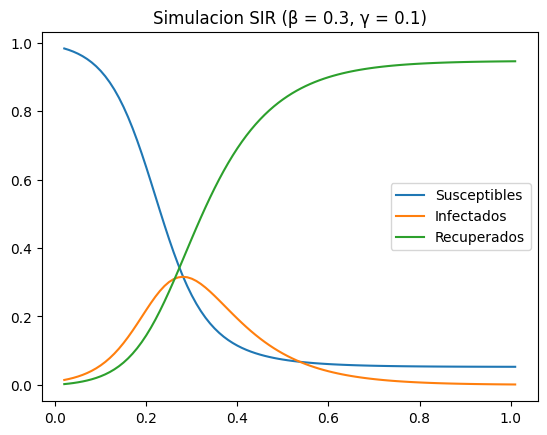

In [98]:
# Por ultimo, podemos graficar sus resultados para una cantidad de simulaciones dada
nsims = 100
model.describe()
model.plot(nsims)

# Modelo ABM
Para recrear lo qué se solicitaba en las instrucciones de un modelo ABM con agentes, se realizaron 2 clases,
- *la clase agente*,
  - sus atributos tienen: la edad, el cumplimiento de la mascarilla, si está vacunado o no,
  - Incluye el estado epidemiológico (S, I, R).
  - El comportamiento se define mediante una función que recrea las interacciones diarias con otros agentes, considerando estos factores:
    - Probabilidad base de transmisión.
    - Reducción del riesgo por uso de mascarilla.
    - Aumento del riesgo en personas mayores de 60 años.
    - Reducción de la probabilidad si el agente está vacunado.
  - Además, se simulan superpropagadores (5% de la población), que son qué realizan un número elevado de contactos diarios.
- *la clase ABM*,
  - Utiliza un arreglo de objetos Agente para representar a toda la población.
  - Controla la simulación a lo largo del tiempo, realizando pasos en los que cada agente interactúa con otros seleccionados aleatoriamente.
  - Lleva un historial del número de susceptibles, infectados y recuperados en cada paso, para poder analizar y graficar la evolución de la epidemia.
  - También permite configurar parámetros globales como el tamaño de la población, la probabilidad de infección, la tasa de recuperación y la tasa de vacunación inicial.

In [ ]:
%load_ext autoreload
%autoreload 2
# Lo anterior es para que los cambios en el código se reflejen automáticamente en el notebook
from abm import ABM

# Inicializacion del modelo ABM
abm = ABM(
    population_size=1000,
    transmition=0.3,
    recovery=0.1,
    initial_infected=10,
    vaccination_rate=0.0
)
abm.describe()       # Estado inicial

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
t: 0
S: 990 (99.0000%)
I: 10 (1.0000%)
R: 0 (0.0000%)


Esto es exactamente lo esperado porqué :

- Población total = 1000
- 10 infectados iniciales y el resto susceptibles.
- Ningún recuperado porque no ha pasado tiempo aún.

In [100]:
# Podemos avanzar el modelo con la funcion next y dandole los pasos que queremos avanzar
abm.next(steps=100)   # Corre simulación
abm.describe()       

t: 100
S: 57 (5.7000%)
I: 0 (0.0000%)
R: 943 (94.3000%)


Después de 100 días simulados es el resultado esperado porque:
- Solo quedan 57 personas susceptibles porque ya no fueron expuestas.
- Todos los infectados se recuperaron, así que I=0
- La epidemia pasó por la población, dejando R=943.
El 94.3% de la población estuvo expuesta e infectada en algún momento, lo cual es consistente con un R0>1 y estos parámetros (β=0.3, γ=0.1).

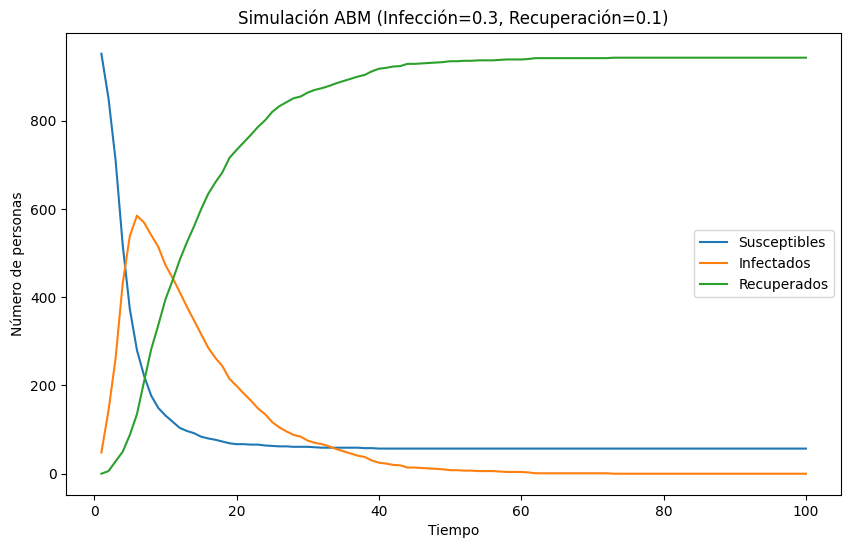

In [101]:
# Por ultimo, podemos graficar sus resultados para una cantidad de simulaciones dada
abm.plot()           # Gráfica de resultados